<a href="https://colab.research.google.com/github/asrivasSW/AI-CLASS/blob/main/IA_taller1_corte3/Taller1_corte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER 1, CORTE III

# REALIZADO POR: ANDRÉS STEVEN RIVAS SALAS

Exploraremos algunos datos, que contiene el siguiente dataset:

https://www.kaggle.com/datasets/kainatjamil12/housing

## Librerias a importar

In [36]:
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Descarga del dataset

Una vez hallamos elegido nuestro dataset, vamos a proceder a bajarlo con las siguientes lineas de código

In [3]:
# Download latest version
path = kagglehub.dataset_download("kainatjamil12/housing")

print("Path to dataset files:", path)

100%|██████████| 4.63k/4.63k [00:00<00:00, 5.64MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kainatjamil12/housing/versions/1


Una vez descargado, imprimeros el nombre de nuestro archivo

In [4]:
# List the contents of the downloaded dataset directory
print(os.listdir(path))

['Housing.csv']


Una vez tengamos el nombre del archivo, procederemos a construir la ruta del mismo y leer el respectivo dataset, de la siguiente manera

In [5]:
# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'Housing.csv')

# Read the CSV file into a pandas DataFrame, specifying the encoding, skipping bad lines, and using semicolon as delimiter
df = pd.read_csv(csv_file_path)

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Tipos de datos

En estadística aplicada a la ciencia de datos, es fundamental comprender los tipos de variables presentes en cualquier conjunto de información. Estas pueden clasificarse en dos grandes grupos:

**Datos categóricos:** incluyen variables ordinales (con un orden definido) y nominales (sin orden).

**Datos numéricos:** se dividen en discretos y continuos.

Para ilustrar esto, se analiza un dataset que contiene algunos de estos tipos de variables.

In [6]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


Al revisar los tipos de datos del conjunto de precios de casas, se observa lo siguiente:

Las columnas marcadas como object corresponden a variables categóricas.

Las columnas int64 representan valores numéricos discretos.

### Descripción del dataset, con pandas

La librería pandas permite generar rápidamente un conjunto de medidas estadísticas básicas mediante el método **DataFrame.describe()**, el cual calcula información como:

Cantidad de datos (count)

Media

Desviación estándar

Valores mínimo y máximo

Cuartiles

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Medias de tendencia central

Las medidas más utilizadas para describir el comportamiento general de un conjunto de datos son:

Media: promedio de los valores.

Mediana: punto medio cuando los datos están ordenados.

Moda: valor que aparece con mayor frecuencia.

Observemos la columna 'price', y 'area' de nuestro dataset, de la siguiente manera

In [9]:
df['price'].mean()

np.float64(4766729.247706422)

In [10]:
df['price'].median()

4340000.0

In [12]:
df['area'].mean()

np.float64(5150.54128440367)

In [13]:
df['area'].median()

4600.0

Al analizar el precio de las casas y el tamaño de las areas de estas, en el dataset, la media resulta algo mayor que la mediana. Esto sugiere la presencia de valores atípicos que generan un sesgo hacia la derecha.

<Axes: ylabel='Frequency'>

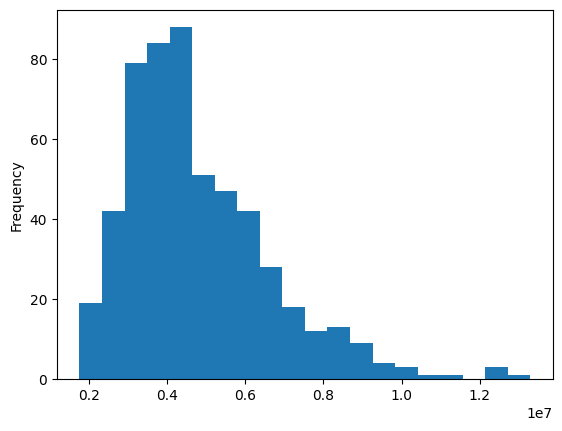

In [11]:
df['price'].plot.hist(bins=20)

El eje x del grafico se visualiza de esa manera, porque se encuentra con notación cientifica. (0.2x10^7 = 2.000.000)

<Axes: ylabel='Frequency'>

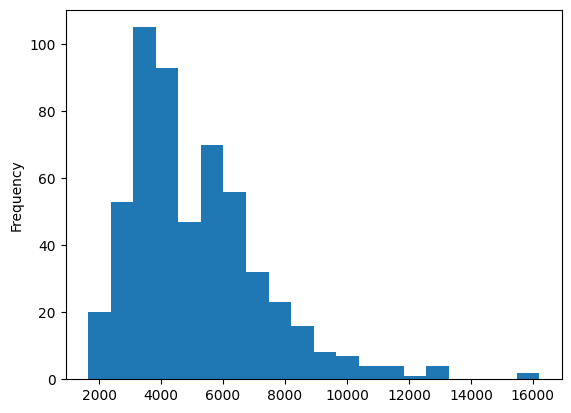

In [14]:
df['area'].plot.hist(bins=20)

También podríamos analizar el precio de estas viviendas, por el area

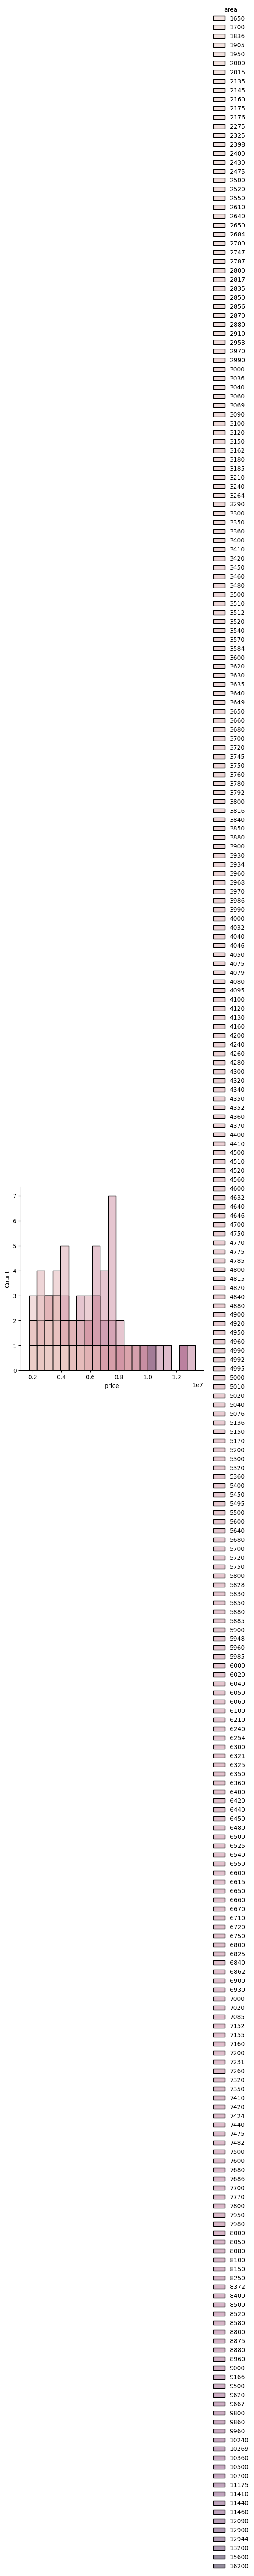

In [22]:
sns.displot(df, x='price', hue='area')

Como podemos ver anteriormente, no hay una buena visualización de los datos ya que hay mucha información respecto a la variable 'area', así que procederemos a realizar pequeñas agrupaciones

In [17]:
df['area_group'] = pd.cut(df['area'],
                          bins=5,
                          labels=['Muy pequeña','Pequeña','Media','Grande','Muy grande'])

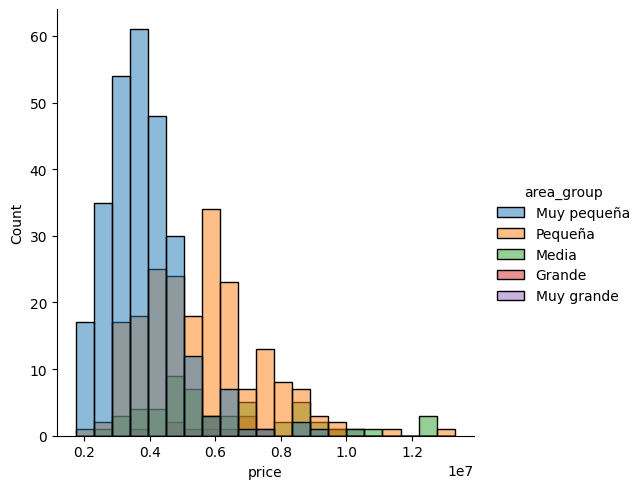

In [19]:
sns.displot(df, x='price', hue='area_group')

El histograma anterior, tecnicamente no nos muestra las casas, que tienen un area grande, o muy grande. ¿Dónde se encuentran?

In [21]:
df['area_group'].value_counts()

,count
area_group,
Muy pequeña,272
Pequeña,204
Media,54
Grande,13
Muy grande,2


Observemos el precio de las viviendas, por su estado de amueblamiento y con un area pequeña

<Axes: xlabel='price', ylabel='Count'>

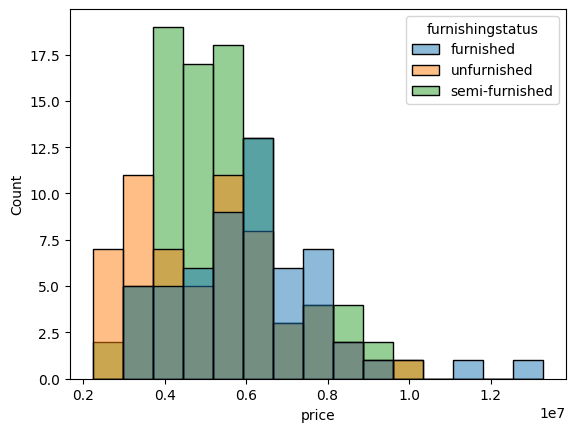

In [25]:
H_df = df[df['area_group'] == 'Pequeña']
sns.histplot(H_df, x='price', hue='furnishingstatus')

Ahora por habitación

<Axes: xlabel='price', ylabel='Count'>

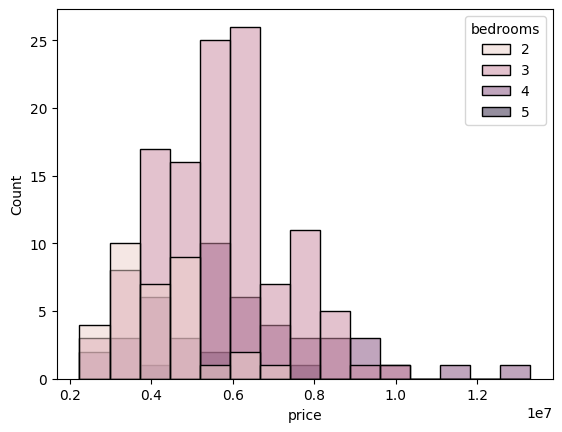

In [27]:
sns.histplot(H_df, x='price', hue='bedrooms')

Ahora por parking

<Axes: xlabel='price', ylabel='Count'>

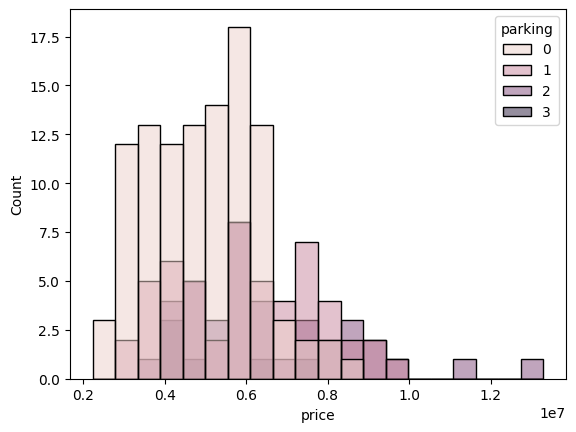

In [35]:
sns.histplot(H_df, x='price', hue='parking', bins=20, stat="count")

Se puede concluir que lo recomendable si quieres una vivienda calidad-precio, sería una casa semi amueblada, sin parking, con máximo 3 habitaciones.

### Medidas de dispersión

In [30]:
# Desviación estandar
df['price'].std()

1870439.615657394

In [31]:
# Cuartiles
median = df['price'].median()
q1 = df['price'].quantile(q=0.25)
q3 = df['price'].quantile(q=0.75)
min_val = df['price'].quantile(q=0)
max_val = df['price'].quantile(q=1.0)
print("Min=", min_val, "Q1=", q1, "Q2=", median, "Q3=", q3, "Max=", max_val)

Min= 1750000.0 Q1= 3430000.0 Q2= 4340000.0 Q3= 5740000.0 Max= 13300000.0


In [32]:
# Rango intercuartil
iqr = q3 - q1
iqr

np.float64(2310000.0)

### Limites para detectar outliers

In [38]:
min_limit = q1 - (1.5 * iqr)
max_limit = q3 + (1.5 * iqr)
print("Valor mínimo =", min_limit, "| Valor máximo =", max_limit)

Valor mínimo = -35000.0 | Valor máximo = 9205000.0


<Axes: xlabel='price', ylabel='Count'>

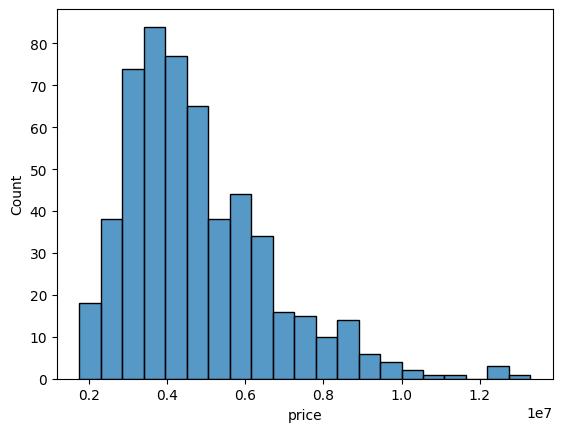

In [39]:
sns.histplot(df['price'])

<Axes: ylabel='price'>

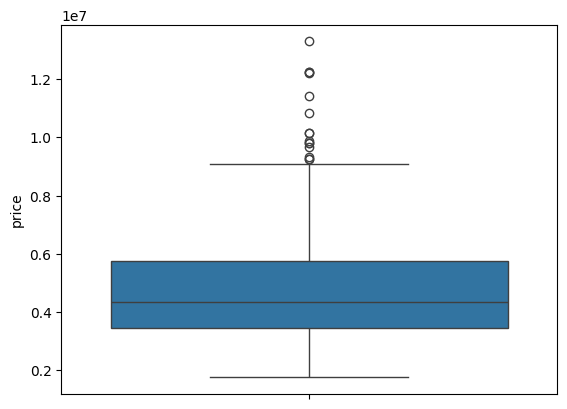

In [40]:
sns.boxplot(df['price'])

<Axes: xlabel='area_group', ylabel='price'>

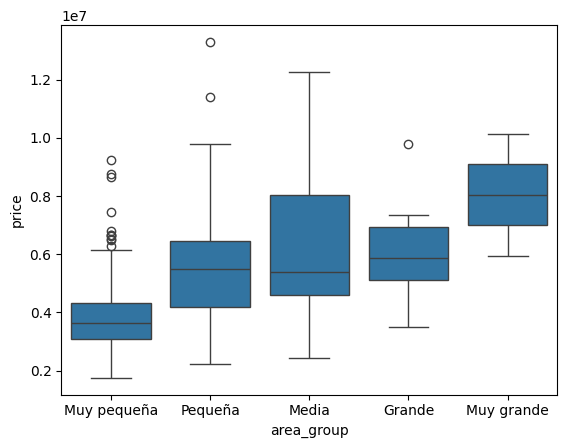

In [42]:
sns.boxplot(data=df, x='area_group', y='price')

<Axes: xlabel='bedrooms', ylabel='price'>

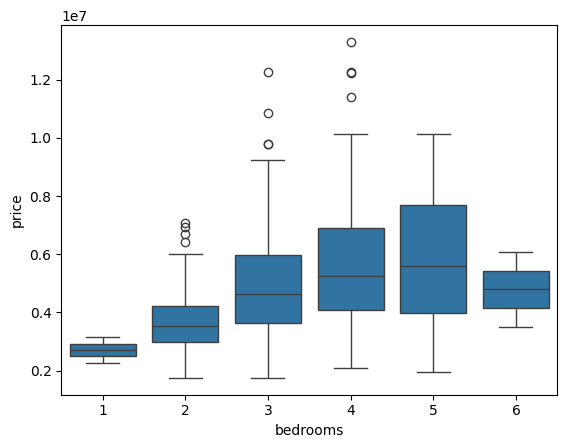

In [43]:
sns.boxplot(data=df, x='bedrooms', y='price')

Hay algunas casas costosas que tienen pocas habitaciones, por lo que no hay relación en cuanto a mayor cantidad de habitaciones, más costosa es la vivienda. además de tener una cantidad de outliers visibles

### Diagramas de dispersión

<Axes: xlabel='price', ylabel='area'>

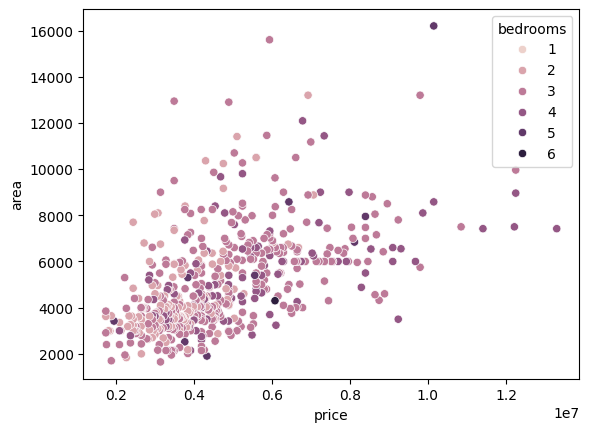

In [44]:
# scatterplot
sns.scatterplot(data=df, x='price', y='area', hue='bedrooms')

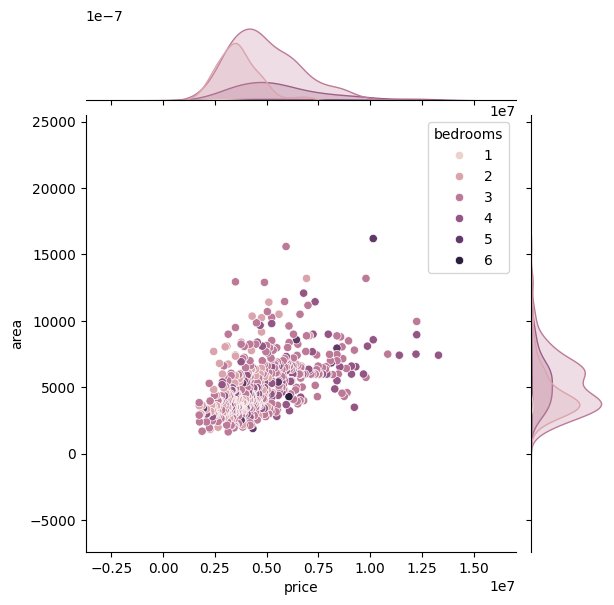

In [46]:
# jointplot
sns.jointplot(data=df, x='price', y='area', hue='bedrooms')

Área y precio están altamente correlacionados.

Más habitaciones tienden a aparecer en viviendas más grandes y caras.

La relación no es perfecta: hay casas pequeñas muy caras y grandes muy baratas → esto probablemente depende de:

amueblado

ubicación

aire acondicionado

sótano, parqueo, etc.

<Axes: xlabel='furnishingstatus', ylabel='price'>

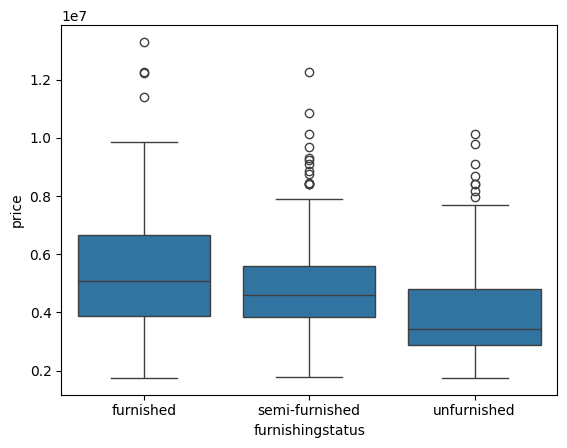

In [50]:
# boxplot
sns.boxplot(data=df, x='furnishingstatus', y='price')

<Axes: xlabel='price', ylabel='furnishingstatus'>

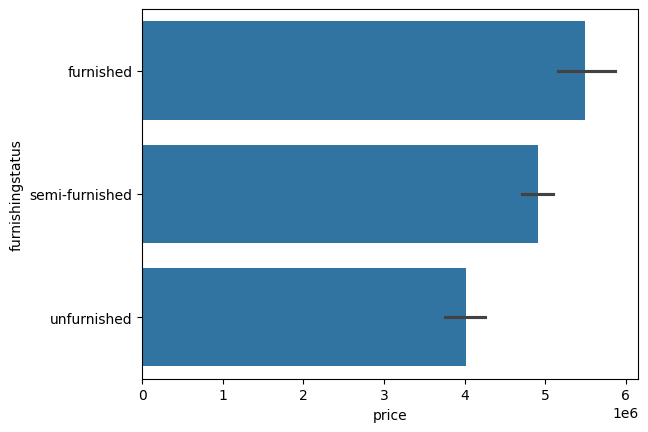

In [49]:
# barplot
sns.barplot(data=df, y='furnishingstatus', x='price')

Las casas furnished tienen la mayor dispersión, lo que significa que se venden tanto casas amobladas de gama media como casas de lujo totalmente equipadas.

Las unfurnished son más homogéneas: casi todas dentro de un rango de precio más bajo.  

<br>

Hay varias casas extremadamente costosas incluso dentro de semi-furnished y unfurnished.
Esto sugiere que:

El amoblado no siempre determina un precio alto.

Algunos factores como ubicación, tamaño o amenities pueden elevar mucho el valor.